In [1]:
import tensorflow as tf

2024-06-29 15:54:09.914059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [3]:
import keras

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Downloads/archive/.DS_Store
Downloads/archive/test/apple/Image_10.jpg
Downloads/archive/test/apple/Image_8.jpg
Downloads/archive/test/apple/Image_9.jpg
Downloads/archive/test/apple/Image_2.jpg
Downloads/archive/test/apple/Image_3.jpg
Downloads/archive/test/apple/Image_1.jpg
Downloads/archive/test/apple/Image_4.jpg
Downloads/archive/test/apple/Image_5.jpg
Downloads/archive/test/apple/Image_7.jpg
Downloads/archive/test/apple/Image_6.JPG
Downloads/archive/test/turnip/Image_10.jpg
Downloads/archive/test/turnip/Image_8.jpg
Downloads/archive/test/turnip/Image_9.jpg
Downloads/archive/test/turnip/Image_2.jpg
Downloads/archive/test/turnip/Image_3.jpg
Downloads/archive/test/turnip/Image_1.jpg
Downloads/archive/test/turnip/Image_4.jpg
Downloads/archive/test/turnip/Image_5.jpg
Downloads/archive/test/turnip/Image_7.jpg
Downloads/archive/test/turnip/Image_6.jpg
Downloads/archive/test/chilli pepper/Image_6.jpeg
Downloads/archive/test/chilli pepper/Image_10.jpg
Downloads/archive/test/chilli pepper/Ima

In [5]:
from pathlib import Path
import os.path
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train_dir=Path('Downloads/archive/train')
train_filepaths=list(train_dir.glob(r'**/*.jpg'))

In [7]:
test_dir=Path('Downloads/archive/test')
test_filepaths=list(test_dir.glob(r'**/*.jpg'))

In [8]:
val_dir=Path('Downloads/archive/validation')
val_filepaths=list(val_dir.glob(r'**/*.jpg'))

In [9]:
def image_processing(filepath):
    #create a dataframe with filepath and labels of the pictures
    
    labels=[str(filepath[i]).split("/")[-2] \
            for i in range(len(filepath))]

    filepath=pd.Series(filepath, name='Filepath').astype(str)
    labels=pd.Series(labels, name='Label')


    #Concatenate filepaths and labels

    df=pd.concat([filepath, labels], axis=1)

    #Shuffle the DataFrame and reset index

    df=df.sample(frac=1).reset_index(drop=True)
    return df


In [10]:
train_def=image_processing(train_filepaths)
test_def=image_processing(test_filepaths)
val_def=image_processing(val_filepaths)

In [11]:
print('--Training set --\n')
print(f'Number of pictures: {train_def.shape[0]}\n')
print(f'Number of different labels:{len(train_def.Label.unique())}\n')
print(f'Labels: {train_def.Label.unique()}')

--Training set --

Number of pictures: 2780

Number of different labels:36

Labels: ['onion' 'corn' 'grapes' 'eggplant' 'soy beans' 'lettuce' 'peas' 'raddish'
 'kiwi' 'potato' 'banana' 'garlic' 'sweetpotato' 'jalepeno' 'watermelon'
 'orange' 'cucumber' 'tomato' 'cabbage' 'turnip' 'carrot' 'apple' 'ginger'
 'bell pepper' 'capsicum' 'mango' 'chilli pepper' 'lemon' 'pear'
 'pomegranate' 'pineapple' 'cauliflower' 'paprika' 'spinach' 'sweetcorn'
 'beetroot']


In [12]:
train_def.head(5)

,Filepath,Label
0,Downloads/archive/train/onion/Image_85.jpg,onion
1,Downloads/archive/train/corn/Image_28.jpg,corn
2,Downloads/archive/train/grapes/Image_47.jpg,grapes
3,Downloads/archive/train/eggplant/Image_15.jpg,eggplant
4,Downloads/archive/train/soy beans/Image_30.jpg,soy beans


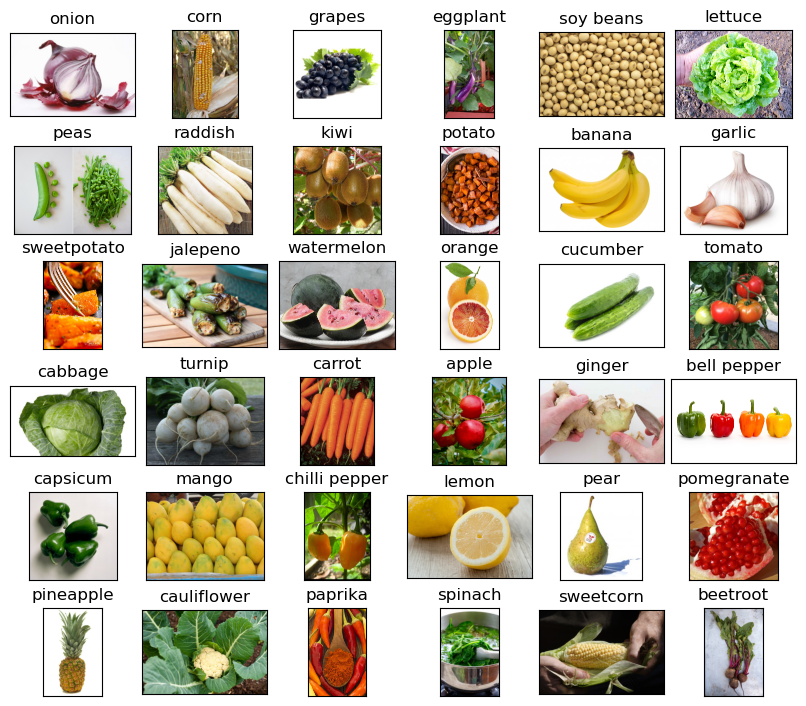

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming train_def is your DataFrame and it has columns 'Label' and 'Filepath'
df_unique = train_def.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize=12)

plt.tight_layout(pad=0.5)
plt.show()

In [14]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [15]:
train_images=train_generator.flow_from_dataframe(
    dataframe=train_def,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 2780 validated image filenames belonging to 36 classes.


In [16]:
val_images=train_generator.flow_from_dataframe(
    dataframe=val_def,
    x_col='Filepath',       # Column name in `val_def` DataFrame containing file paths of images
    y_col='Label',          # Column name in `val_def` DataFrame containing corresponding labels
    target_size=(224,224),  # Target size of images to resize them to during data loading
    color_mode='rgb',  
    class_mode='categorical',   #each label is one hot encoded
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 334 validated image filenames belonging to 36 classes.


In [17]:
test_images=test_generator.flow_from_dataframe(
    dataframe=test_def,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [18]:
pretrained_model=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable=False

In [25]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x=tf.keras.layers.Dense(128,activation='relu')(x)
outputs = tf.keras.layers.Dense(36, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
history = model.fit(
    train_images,
    validation_data=val_images, 
    batch_size=32, 
    epochs=5, 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=2, 
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


2024-06-29 16:03:24.573924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


87/87 [==============================] - ETA: 0s - loss: 1.7665 - accuracy: 0.5219

2024-06-29 16:04:40.109362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


87/87 [==============================] - 88s 987ms/step - loss: 1.7665 - accuracy: 0.5219 - val_loss: 0.5453 - val_accuracy: 0.8054
Epoch 2/5
87/87 [==============================] - 86s 992ms/step - loss: 0.5757 - accuracy: 0.8180 - val_loss: 0.2934 - val_accuracy: 0.9162
Epoch 3/5
87/87 [==============================] - 87s 1s/step - loss: 0.3480 - accuracy: 0.8867 - val_loss: 0.2682 - val_accuracy: 0.9251
Epoch 4/5
87/87 [==============================] - 88s 1s/step - loss: 0.2330 - accuracy: 0.9237 - val_loss: 0.1821 - val_accuracy: 0.9551
Epoch 5/5
87/87 [==============================] - 88s 1s/step - loss: 0.1516 - accuracy: 0.9525 - val_loss: 0.1633 - val_accuracy: 0.9491


In [20]:
import numpy as np  
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1) 
labels = (train_images.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

2024-06-29 16:02:59.593280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 12s 1s/step


['grapes',
 'eggplant',
 'lettuce',
 'sweetcorn',
 'kiwi',
 'paprika',
 'onion',
 'soy beans',
 'jalepeno',
 'capsicum',
 'ginger',
 'chilli pepper',
 'peas',
 'corn',
 'turnip',
 'jalepeno',
 'kiwi',
 'lettuce',
 'capsicum',
 'garlic',
 'pear',
 'watermelon',
 'apple',
 'jalepeno',
 'raddish',
 'lettuce',
 'beetroot',
 'onion',
 'chilli pepper',
 'cucumber',
 'cauliflower',
 'mango',
 'apple',
 'sweetcorn',
 'beetroot',
 'sweetpotato',
 'watermelon',
 'paprika',
 'grapes',
 'peas',
 'cauliflower',
 'ginger',
 'pomegranate',
 'eggplant',
 'capsicum',
 'mango',
 'spinach',
 'pomegranate',
 'eggplant',
 'paprika',
 'beetroot',
 'sweetcorn',
 'raddish',
 'jalepeno',
 'corn',
 'orange',
 'paprika',
 'pomegranate',
 'cabbage',
 'corn',
 'soy beans',
 'potato',
 'lettuce',
 'ginger',
 'cabbage',
 'cucumber',
 'carrot',
 'mango',
 'watermelon',
 'eggplant',
 'capsicum',
 'turnip',
 'ginger',
 'apple',
 'tomato',
 'apple',
 'tomato',
 'pomegranate',
 'potato',
 'turnip',
 'jalepeno',
 'paprika

In [21]:
from keras.utils import load_img, img_to_array
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    ans=model.predict(img)
    y_class=ans.argmax(axis=-1)
    y=" ".join(str(x) for x in y_class)
    y=int(y)
    res=labels[y]
    return res
    

In [22]:
img=output('Downloads/Red_Apple.jpeg')
img

1/1 [==============================] - 0s 443ms/step


'apple'

In [23]:
#Downloads/Image_10 (1).jpg
#Downloads/po.jpeg
#Downloads/Red_Apple.jpeg

In [24]:
model.save('Image based Fruits or Vegtables Recognition with Calories.h5')